In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

1.導入csv數據集

In [28]:
df = pd.read_csv('./customer_segmentation_data.csv')
df

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


2.查看資料集資相關資訊

In [29]:
df.info()
#income 購買金額累積
#spending_score 支出分數 消費評分（1-100），顯示顧客的消費行為和忠誠度
#membership_years 會員年數
#purchase_frequency 購買頻率 顧客去年的購買次數
#preferred_category 首選類別 首選購物類別（電子產品、服裝、雜貨、家居和園藝、體育）
#last_purchase_amount 最後購買金額 客戶上次購買時花費的金額（以美元為單位）

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


3.是否有遺漏值

In [30]:
df.isnull().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

4.各欄位最大最小平均數等相關數值範圍

In [31]:
gender_describe = df.groupby('gender')[['income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']].describe()
gender_describe

income                                                         \
        count          mean           std      min      25%      50%   
gender                                                                 
Female  316.0  88018.104430  32930.663360  30074.0  58665.0  86801.5   
Male    357.0  88907.997199  36292.373050  30004.0  54918.0  89688.0   
Other   327.0  88522.703364  33228.407601  30058.0  60328.0  87418.0   

                            spending_score             ... purchase_frequency  \
              75%       max          count       mean  ...                75%   
gender                                                 ...                      
Female  115610.25  149744.0          316.0  51.696203  ...               38.0   
Male    120294.00  149973.0          357.0  48.778711  ...               40.0   
Other   114818.00  149741.0          327.0  51.788991  ...               39.0   

             last_purchase_amount                                           \
         max                count        mean         std    min       25%   
gender                                                                       
Female  50.0                316.0  458.018892  291.564846  11.01  205.2525   
Male    50.0                357.0  496.090112  305.276610  12.36  208.7900   
Other   50.0                327.0  521.438930  286.548628  10.40  272.4300   

                                   
            50%       75%     max  
gender                             
Female  420.555  690.6825  999.74  
Male    491.640  755.6700  997.15  
Other   547.850  766.7200  997.24  

[3 rows x 40 columns]

5.單一欄位各數計算

In [32]:
#計算每個性別的客戶數量
gender_count = df['gender'].value_counts()
gender_count

gender
Male      357
Other     327
Female    316
Name: count, dtype: int64

6.透過groupby合併計算欄位的平均

In [33]:
#分析不同性別的平均年齡、收入、消費得分等
gender_mean = df.groupby('gender')[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']].mean()
gender_mean.round(2)

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
gender,,,,,,
Female,43.88,88018.1,51.70,5.32,25.42,458.02
Male,42.43,88908.0,48.78,5.57,28.30,496.09
Other,45.17,88522.7,51.79,5.51,25.87,521.44


7.使用seaborn繪製相關圖表

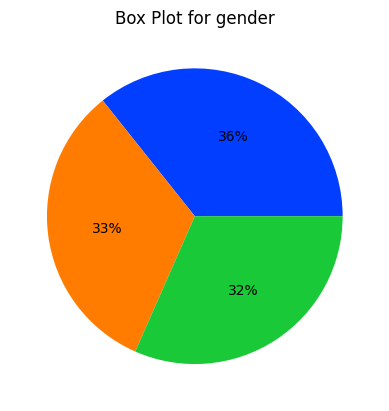

In [34]:
colors = sns.color_palette("bright")
plt.pie(gender_count, colors=colors, autopct="%0.0f%%")
plt.title("Box Plot for gender")
plt.show()

In [35]:
male_df = df[df['gender'] == 'Male']
female_df = df[df['gender'] == 'Female']
others_df = df[df['gender'] == 'Other']

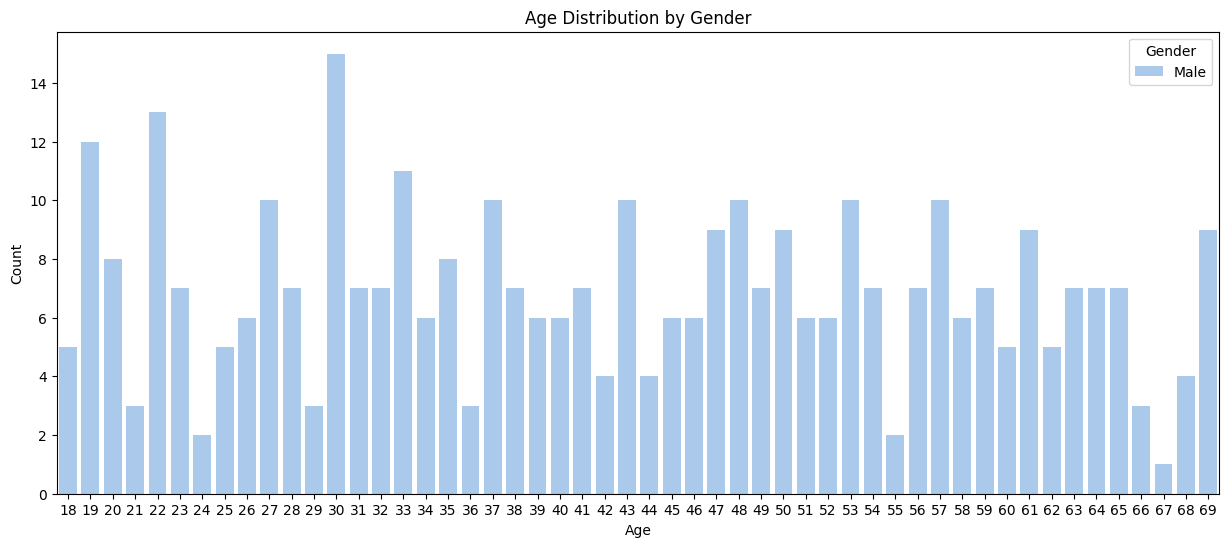

In [36]:
plt.figure(figsize=(15, 6))
sns.countplot(data = male_df, x='age', hue='gender', palette='pastel')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

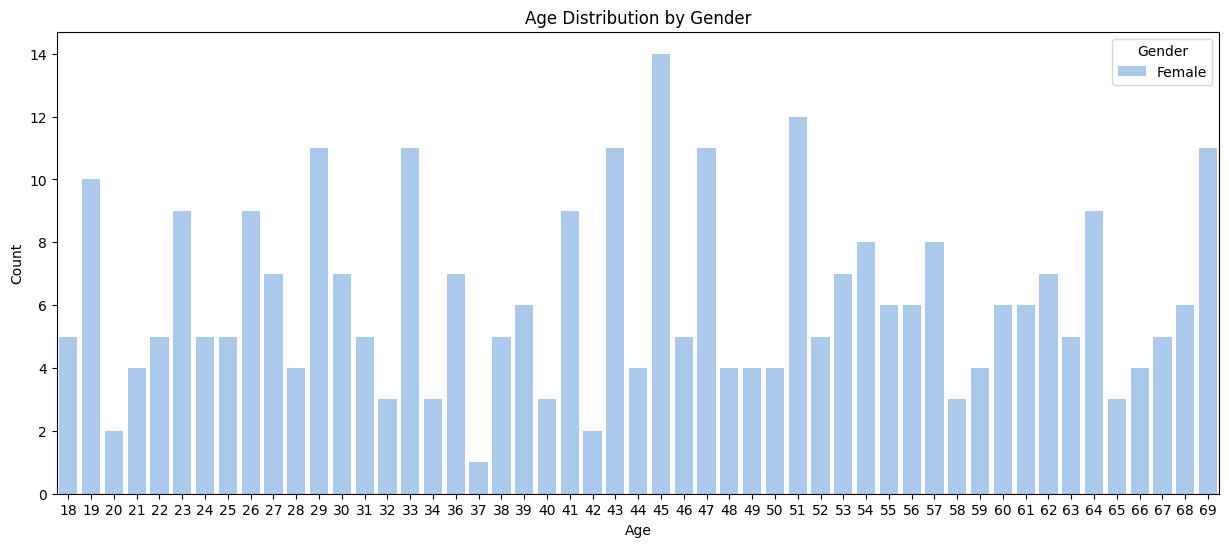

In [37]:
plt.figure(figsize=(15, 6))
sns.countplot(data = female_df, x='age', hue='gender', palette='pastel')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

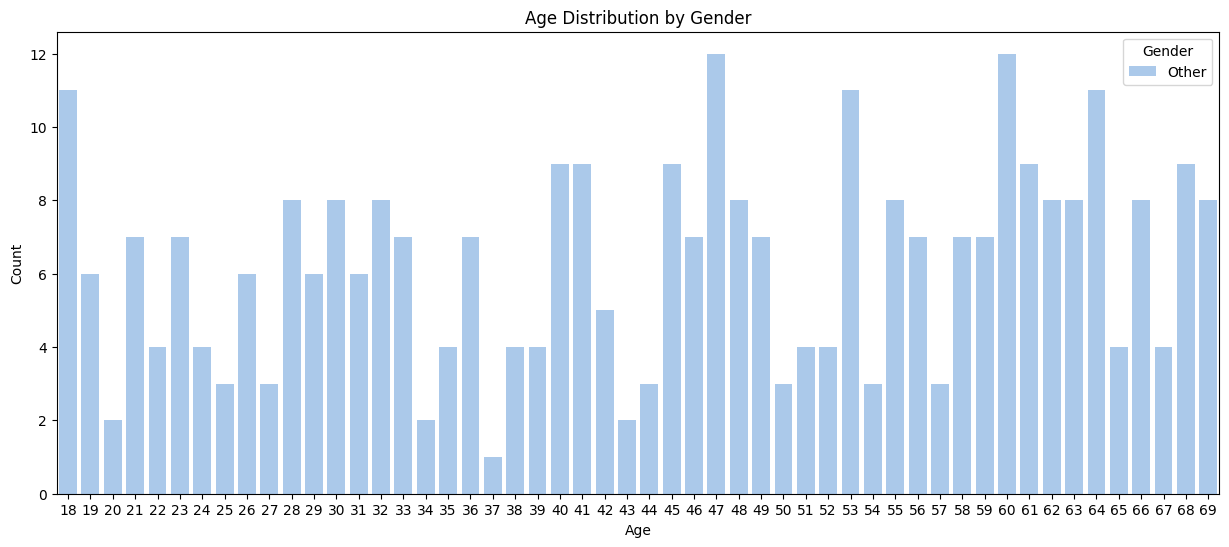

In [38]:
plt.figure(figsize=(15, 6))
sns.countplot(data = others_df, x='age', hue='gender', palette='pastel')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

8.以groupby合併計算欄位的最大最小及平均值

In [39]:
# 將年齡分段
bins = [0, 20, 30, 40, 50, 60, 70]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70']
df['age_group'] = pd.cut(df['age'], bins = bins, labels = labels, right = False)

# 分析每個年齡段的收入、消費得分
age_group_stats = df.groupby('agegroup').agg({'income': ['max', 'median', 'min', 'mean'],'spending_score': ['max', 'median', 'min', 'mean']}).reset_index()
age_group_stats

KeyError: 'agegroup'

<ipython-input-17-b99a5983fccc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='agegroup', palette='pastel')


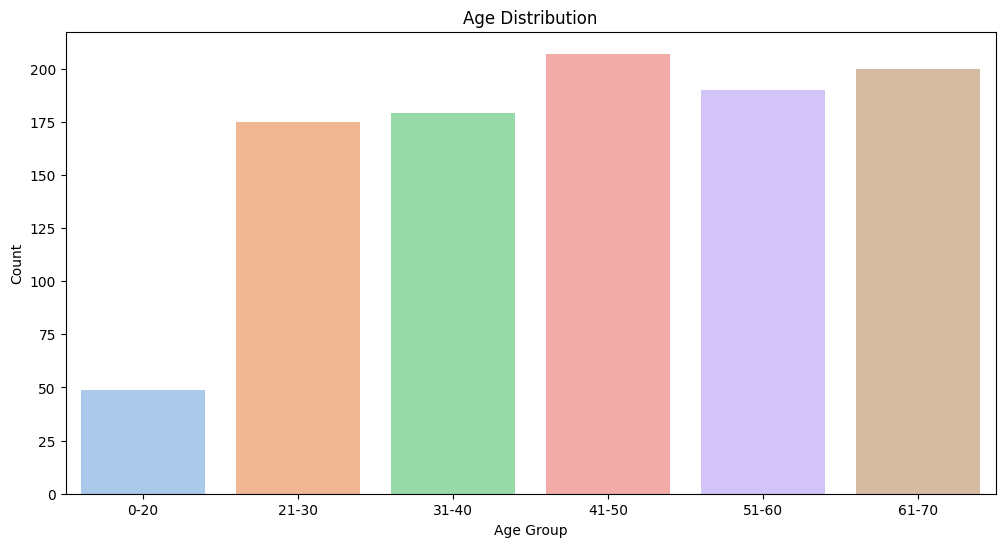

In [ ]:
# 繪製年齡分佈情況
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='agegroup', palette='pastel')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

9.因後續進到power bi進行圖表繪製，依照標準新增一欄去分類哪些客戶為活躍的客戶

In [ ]:
# 定義購買頻率的閾值
purchase_frequency_threshold = 15

# 計算流失標記
df['is_churn'] = df['purchase_frequency'] <= purchase_frequency_threshold

# 顯示前幾行數據
df.head()


,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,age_group,is_churn
0,38,Female,99342,90,3,24,Groceries,113.53,31-40,False
1,21,Female,78852,60,2,42,Sports,41.93,21-30,False
2,60,Female,126573,30,2,28,Clothing,424.36,61-70,False
3,40,Other,47099,74,9,5,Home & Garden,991.93,41-50,True
4,65,Female,140621,21,3,25,Electronics,347.08,61-70,False


10.計算忠誠度的分數
購買頻率（purchase_frequency）： 計算每個顧客在一段時間內的購買次數。頻率越高，分數越高。
購買金額（income）： 計算每個顧客在一段時間內的總購買金額。金額越高，分數越高。
會員年數（membership_years）： 計算每個顧客的會員年數。年數越長，分數越高。
消費分數（spending_score）： 根據顧客的消費行為，給出一個分數，例如根據購買頻率、平均消費金額等。

In [40]:
data2 = df.copy()

# 定義權重
weight_frequency = 0.4
weight_monetary = 0.3
weight_tenure = 0.2
weight_spending = 0.1

# 定義最大值
max_frequency = 50
max_monetary = 200000
max_tenure = 10

# 計算各項指標的分數
data2['Frequency_Score'] = (data2['purchase_frequency'] / max_frequency) * 100
data2['Monetary_Score'] = (data2['income'] / max_monetary) * 100
data2['Membership_Score'] = (data2['membership_years'] / max_tenure) * 100
data2['Spending_Score'] = data2['spending_score']

# 計算忠誠度分數
data2['loyaltyscore'] = (
    weight_frequency * data2['Frequency_Score'] +
    weight_monetary * data2['Monetary_Score'] +
    weight_tenure * data2['Membership_Score'] +
    weight_spending * data2['Spending_Score']
)

df['loyaltyscore'] = data2['loyaltyscore']

df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,age_group,loyaltyscore
0,1,38,Female,99342,90,3,24,Groceries,113.53,31-40,49.10130
1,2,21,Female,78852,60,2,42,Sports,41.93,21-30,55.42780
2,3,60,Female,126573,30,2,28,Clothing,424.36,61-70,48.38595
3,4,40,Other,47099,74,9,5,Home & Garden,991.93,41-50,36.46485
4,5,65,Female,140621,21,3,25,Electronics,347.08,61-70,49.19315


11.存成csv

In [41]:
df.to_csv('./customer_segmentation_data_3.csv')